# Exploratory Analysis of Sales data
Data has already been cleaned and loaded in SQLite database for analysis.

Please note this repository is an minimum viable "product" for a sales data analysis. Given further direction the data and plots would be worked on further to create a more polished end result

In [1]:
import pandas as pd
import sqlite3
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = "../data"
db_name = "SalesData.sqlite"
conn = sqlite3.connect(os.path.join(data_path, db_name))
df = pd.read_sql("SELECT * FROM sales", conn, index_col="index")

In [3]:
df.head()

,sale_id,sale_date,buyer_email_address,transaction_type,total_usd,num_items
index,,,,,,
0,536365,2010-12-01 08:26:00,17850,Sale,139.12,40
1,536366,2010-12-01 08:28:00,17850,Sale,22.20,12
2,536367,2010-12-01 08:34:00,13047,Sale,278.73,83
3,536368,2010-12-01 08:34:00,13047,Sale,70.05,15
4,536369,2010-12-01 08:35:00,13047,Sale,17.85,3


In [4]:
df["sale_date"] = pd.to_datetime(df["sale_date"])

# Sales Rate
Sales Rate will be defined as total Sales per Week per Customer

In [5]:
df["Week"] = df['sale_date'] - pd.to_timedelta(df['sale_date'].dt.dayofweek, unit='d')
df["Week"] = df["Week"].dt.date

In [6]:
sales_rate = df[["buyer_email_address", "Week", "num_items", "total_usd"]].groupby(["buyer_email_address", "Week"]).sum()

In [7]:
sales_rate.head()

num_items  total_usd
buyer_email_address Week                            
12346               2011-01-17          0       0.00
12347               2010-12-06        319     711.79
                    2011-01-24        315     475.39
                    2011-04-04        483     636.25
                    2011-06-06        196     382.52

# Average Purchase Rate in Quantity and in dollars Time Unbounded

From the analysis below the distribution looks fairly skewed, most values lie near zero but there are many that extend into the muti thouands for both price and quantity. Due to this I would likely report the median as the central tendency, which in this case is 150 items and 300 dollars over the total time span

In [8]:
sales_rate.describe()

,num_items,total_usd
count,17782.000000,17782.000000
mean,275.946913,466.767845
std,687.777372,1240.811633
min,-9360.000000,-7246.150000
25%,64.000000,140.342500
50%,150.000000,300.045000
75%,293.000000,466.640000
max,25174.000000,67776.080000


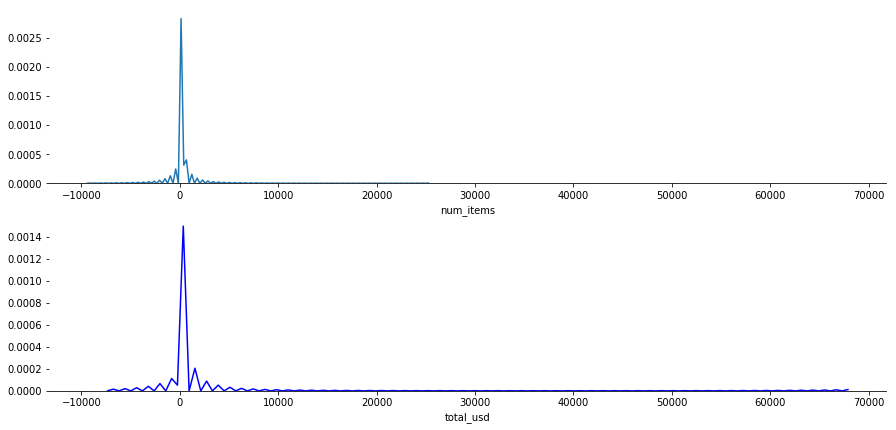

In [9]:
f, axes = plt.subplots(2, 1, figsize=(15, 7), sharex=True)
sns.despine(left=True)

sns.distplot(sales_rate["num_items"], kde=True, hist=False, ax=axes[0])
sns.distplot(sales_rate["total_usd"], kde=True, hist=False, color="b", ax=axes[1])


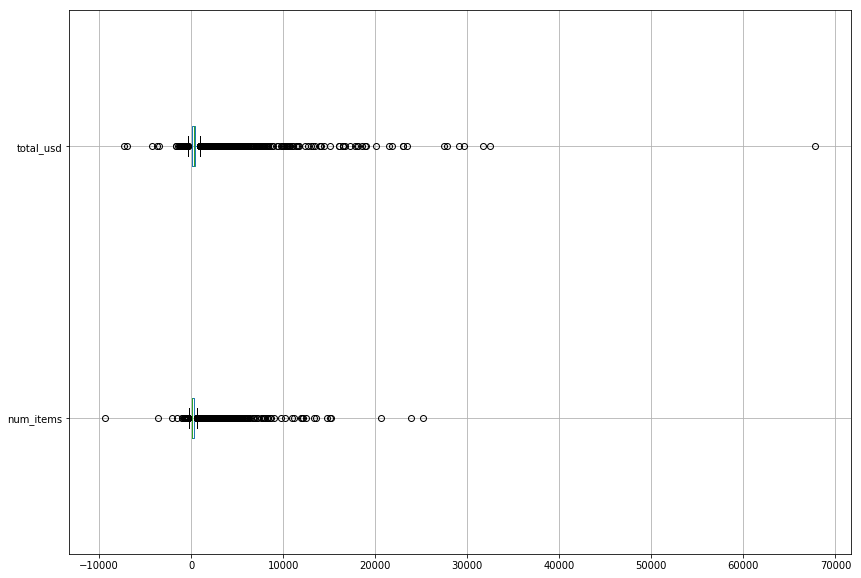

In [13]:
sales_rate.boxplot(vert=False, figsize = (14,10))

# Does central tendency change over time for Num Items
The skew makes it challenging to calculate tendency but given what I see below I would probably remove data points that look weird and add in a trendline, or see if the median is changing week over week

In [20]:
data = sales_rate.reset_index()

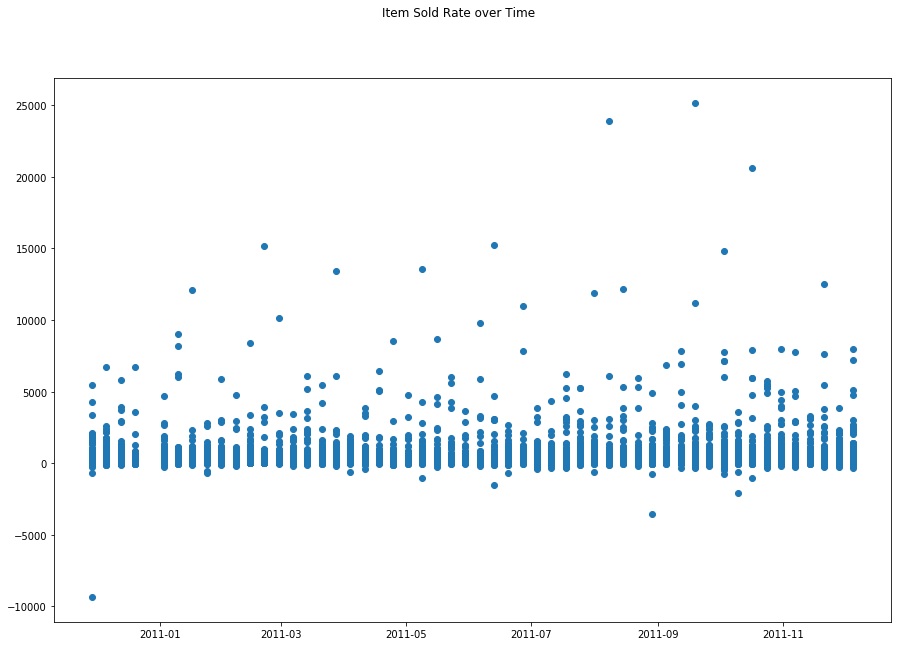

In [32]:
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle("Item Sold Rate over Time")
ax.plot_date(data["Week"], data["num_items"])


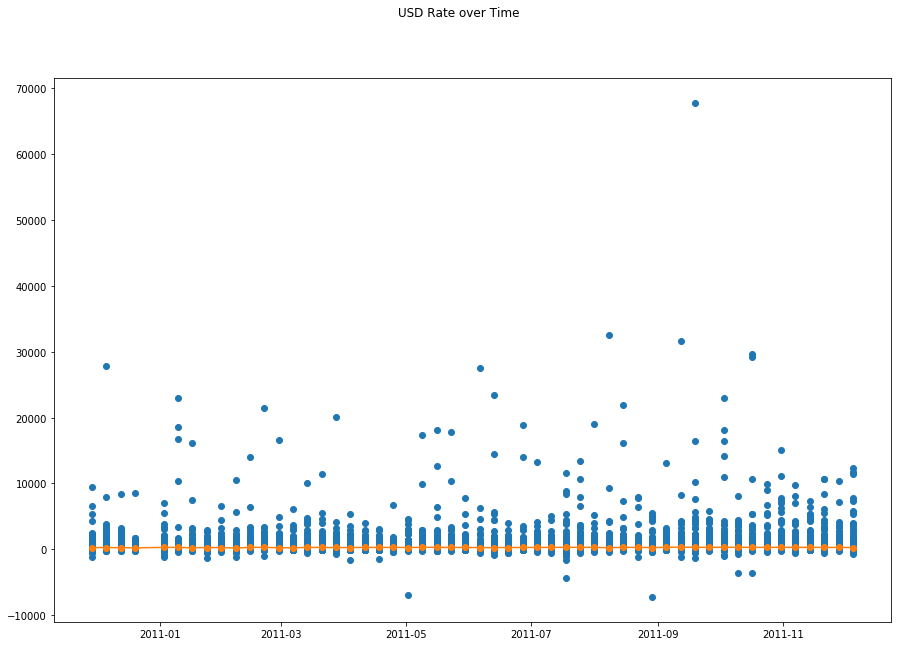

In [36]:
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle("USD Rate over Time")
ax.plot_date(data["Week"], data["num_items"])


trend = data[["Week","num_items"]].groupby("Week").median().reset_index()
ax.plot_date(trend["Week"], trend["num_items"], ls="solid")

Zoom into relevant part of plot to see if median is increasing over time

(-500, 500)

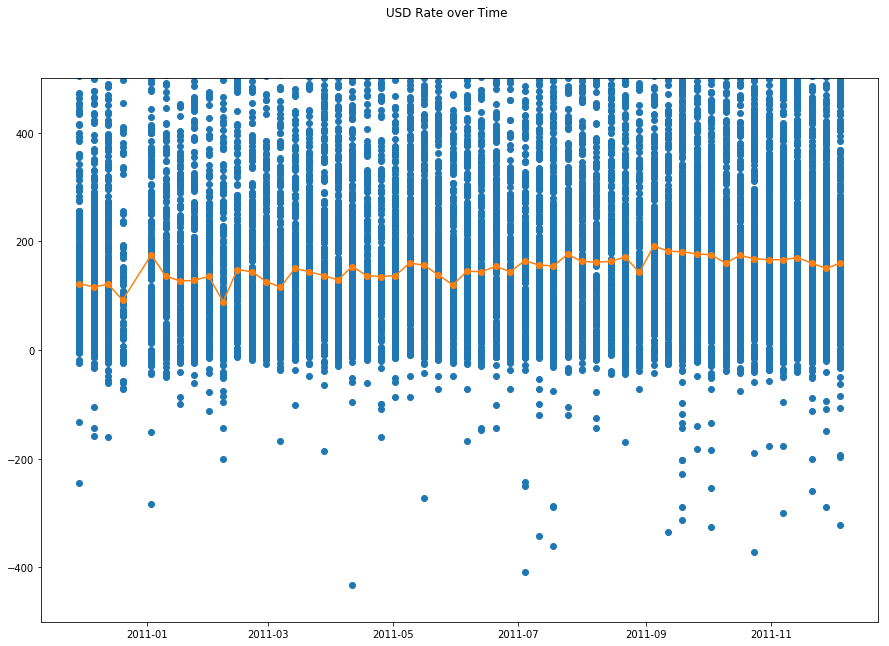

In [42]:
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle("USD Rate over Time")

ax.plot_date(data["Week"], data["num_items"])


trend = data[["Week","num_items"]].groupby("Week").median().reset_index()
ax.plot_date(trend["Week"], trend["num_items"], ls="solid")
ax.set_ylim((-500, 500))


# Does central tendency change over time for Total_USD
The skew makes it challenging to calculate tendency but given what I see below I would probably remove data points that look weird and add in a trendline, or see if the median is changing week over week

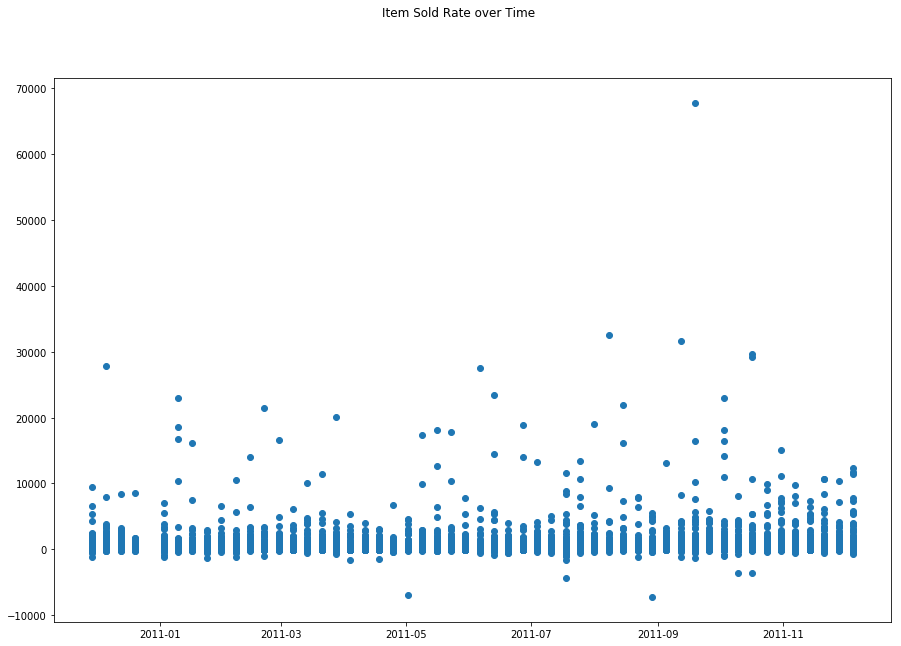

In [43]:
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle("Item Sold Rate over Time")
ax.plot_date(data["Week"], data["total_usd"])

(-500, 500)

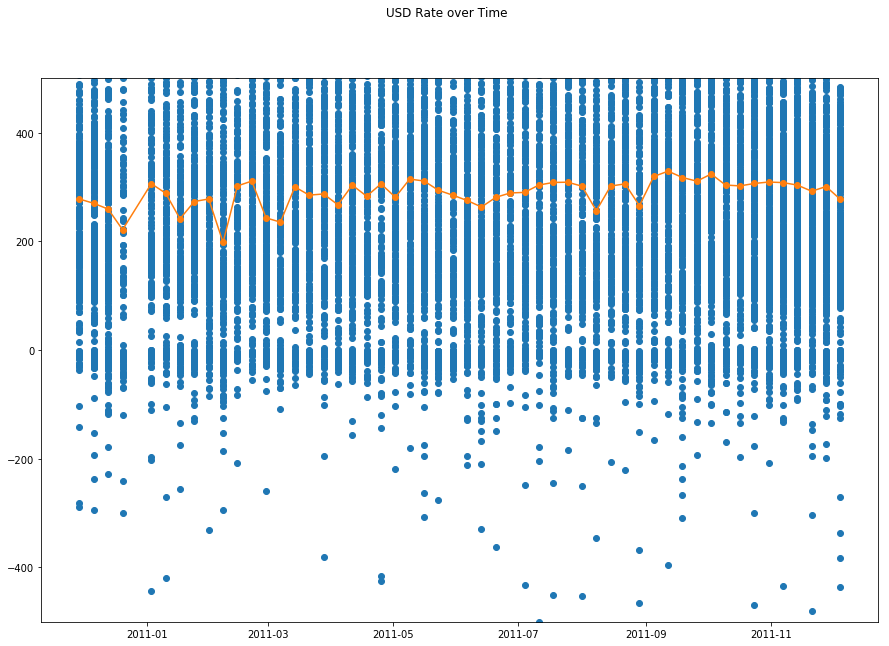

In [44]:
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle("USD Rate over Time")

ax.plot_date(data["Week"], data["total_usd"])

trend = data[["Week","total_usd"]].groupby("Week").median().reset_index()
ax.plot_date(trend["Week"], trend["total_usd"], ls="solid")
ax.set_ylim((-500, 500))